In [1]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\AFA\\Desktop\\Machine learning files\\cars_clus.csv")
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [5]:
df[df['partition'] == 1.0]

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0
158,NaN,newTruck,$null$,$null$,$null$,34.200,3.500,167.000,109.800,75.200,188.400,4.508,17.200,26.000,$null$,1.0


In [7]:
df[["sales", "resale", "type", "price", "engine_s", "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap", "mpg", "lnsales"]] = df[["sales", "resale", "type", "price", "engine_s", "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap", "mpg", "lnsales"]].apply(pd.to_numeric, errors='coberce')
df = df.dropna()
df = df.reset_index(drop=True)
df.head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0
5,Audi,A8,1.380,39.000,0.0,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,0.0
6,BMW,328i,9.231,28.675,0.0,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,0.0
7,BMW,528i,17.527,36.125,0.0,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864,0.0
8,Buick,Century,91.561,12.475,0.0,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517,0.0
9,Buick,Regal,39.350,13.740,0.0,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672,0.0


In [9]:
featureset = df[["engine_s", "horsepow", "wheelbas", "width", "length", "curb_wgt", "fuel_cap", "mpg"]]

In [11]:
from sklearn.preprocessing import MinMaxScaler

x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
dataset = min_max_scaler.fit_transform(x)
dataset[:8]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333],
       [0.45714286, 0.64556962, 0.44251627, 0.68263473, 0.64980027,
        0.62329193, 0.61751152, 0.2       ],
       [0.25714286, 0.34936709, 0.31887202, 0.35329341, 0.35419441,
        0.40434783, 0.29032258, 0.3       ],
       [0.25714286, 0.34936709, 0.40780911, 0.49700599, 0.51398136,
        0.48975155, 0.37788018, 0.32666667]])

In [13]:
import scipy
leng = dataset.shape[0]
D = scipy.zeros([leng, leng])
for i in range(leng):
    for j in range(leng):
        D[i, j] = scipy.spatial.distance.euclidean(dataset[i], dataset[j])

D

C:\Users\AFA\AppData\Local\Temp\ipykernel_13512\2091623367.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  D = scipy.zeros([leng, leng])


array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [15]:
Z = hierarchy.linkage(D, 'complete')
Z

C:\Users\AFA\AppData\Local\Temp\ipykernel_13512\526635344.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


array([[3.60000000e+01, 9.20000000e+01, 5.30569369e-03, 2.00000000e+00],
       [2.80000000e+01, 9.00000000e+01, 1.11182906e-02, 2.00000000e+00],
       [1.12000000e+02, 1.16000000e+02, 1.19477571e-02, 2.00000000e+00],
       [2.10000000e+01, 1.04000000e+02, 2.20380776e-02, 2.00000000e+00],
       [2.60000000e+01, 9.10000000e+01, 5.08875182e-02, 2.00000000e+00],
       [4.10000000e+01, 7.40000000e+01, 5.51219450e-02, 2.00000000e+00],
       [7.60000000e+01, 8.40000000e+01, 7.30546036e-02, 2.00000000e+00],
       [1.90000000e+01, 9.50000000e+01, 1.38180998e-01, 2.00000000e+00],
       [4.00000000e+01, 7.30000000e+01, 1.46458028e-01, 2.00000000e+00],
       [4.20000000e+01, 7.50000000e+01, 1.52430867e-01, 2.00000000e+00],
       [1.60000000e+01, 8.60000000e+01, 1.65373067e-01, 2.00000000e+00],
       [1.01000000e+02, 1.02000000e+02, 1.68979409e-01, 2.00000000e+00],
       [9.90000000e+01, 1.00000000e+02, 1.78730919e-01, 2.00000000e+00],
       [1.10000000e+01, 9.70000000e+01, 1.99570647e

In [19]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

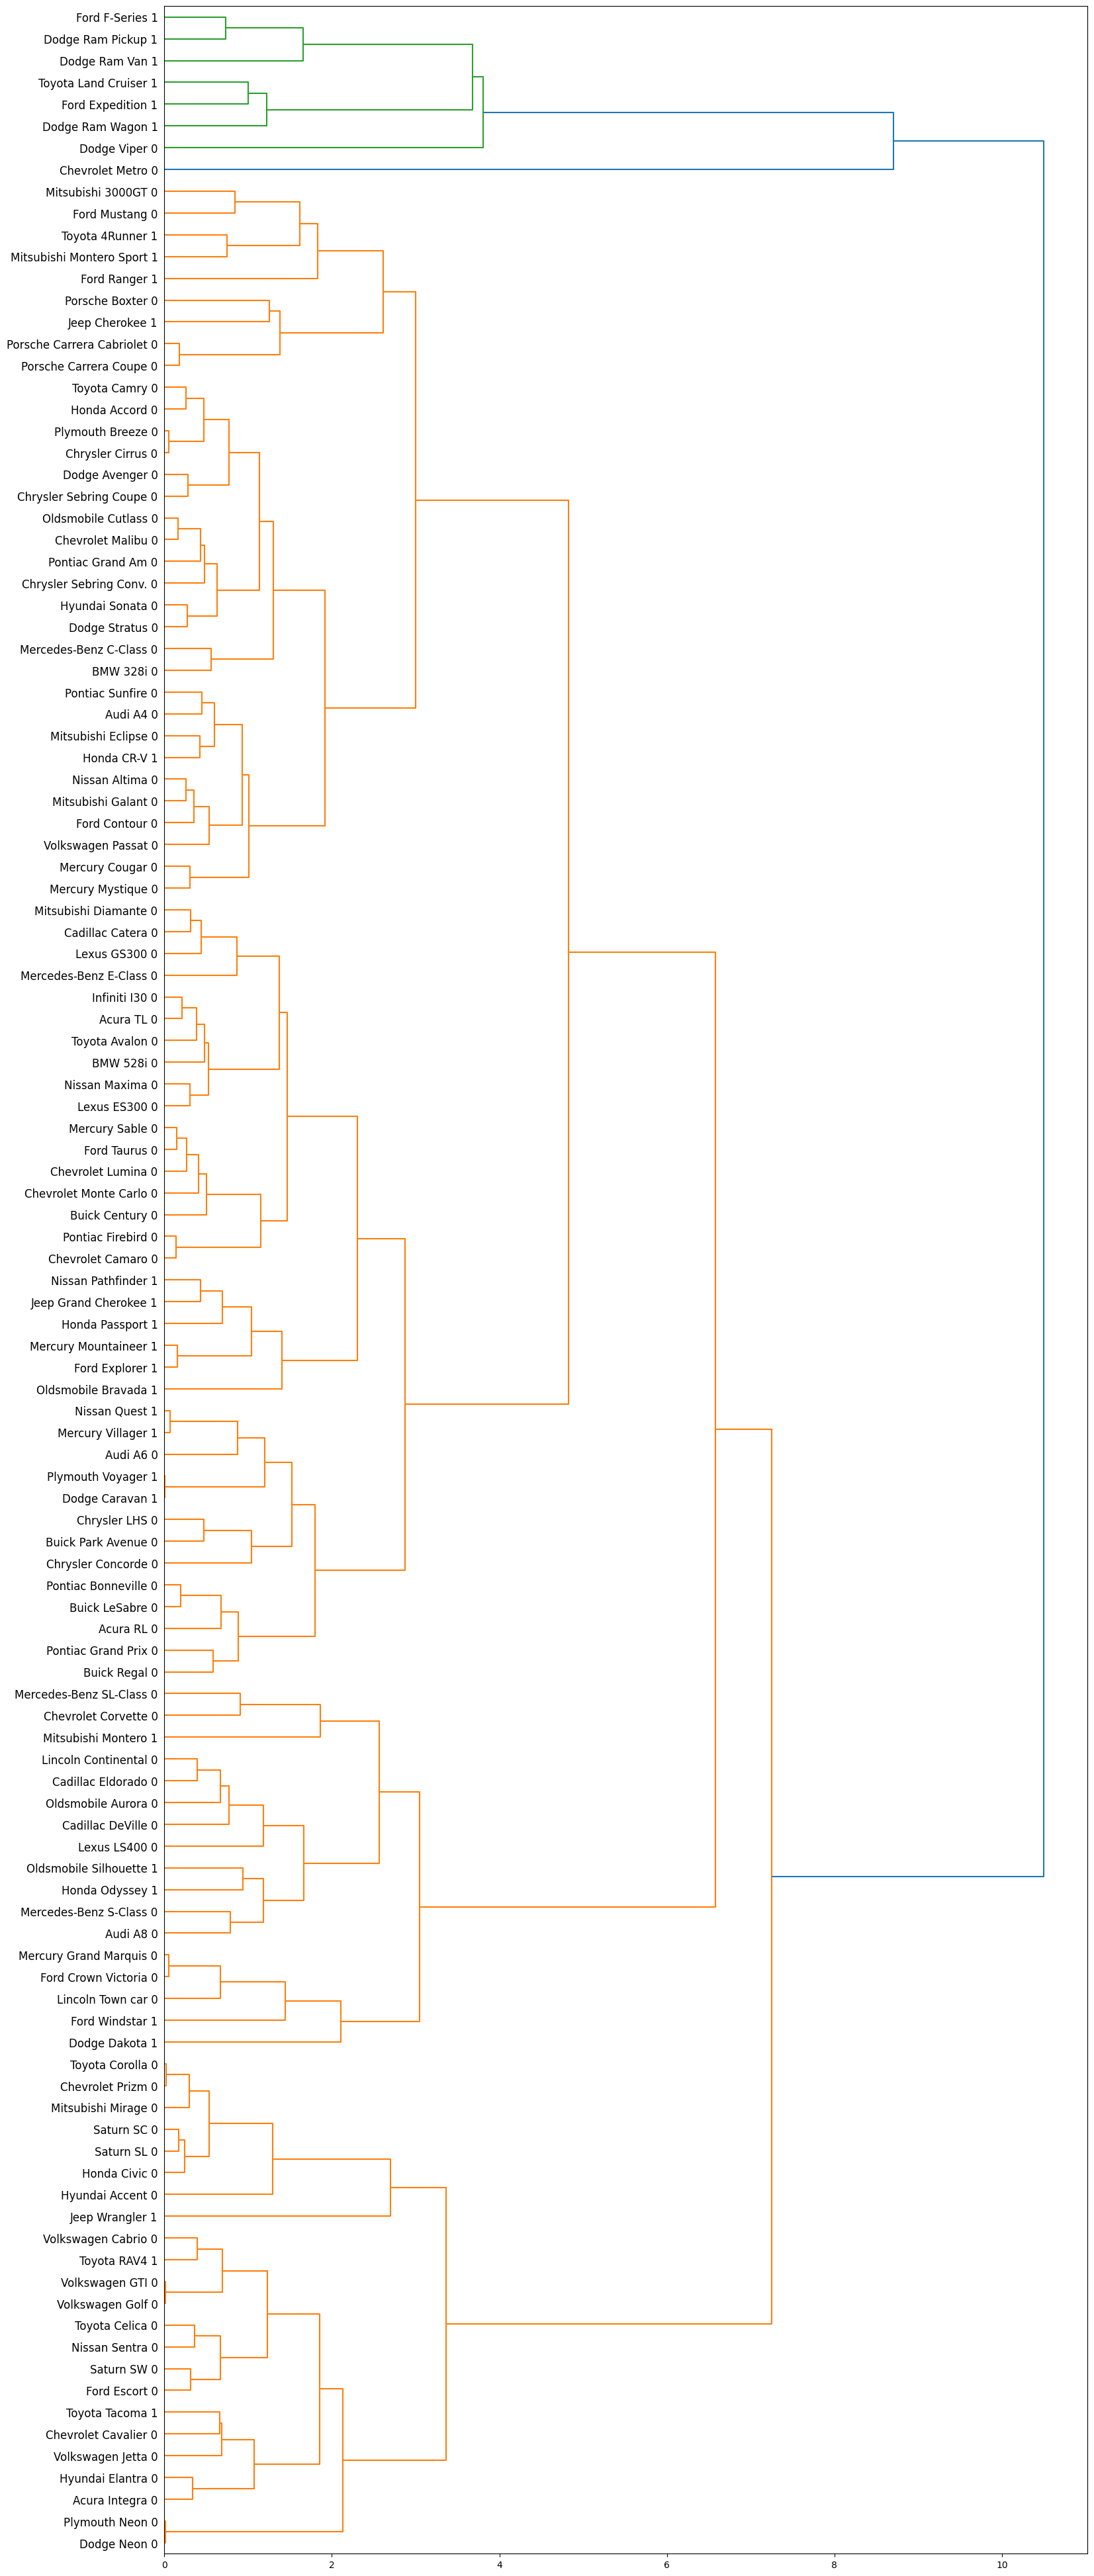

In [23]:
import pylab
fig = pylab.figure(figsize=(18, 50))
def llf(id):
    return '%s %s %s' % (df['manufact'][id], df['model'][id], int(float(df['type'][id])))

dendo = hierarchy.dendrogram(Z, leaf_label_func=llf, leaf_rotation=0, leaf_font_size=12, orientation='right')

In [25]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=6, linkage='complete')
agglom.fit(D)
agglom.labels_

C:\Users\AFA\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:586: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


array([1, 2, 2, 3, 2, 4, 3, 2, 2, 2, 2, 2, 4, 4, 2, 1, 3, 2, 2, 2, 4, 1,
       5, 3, 3, 2, 3, 2, 1, 3, 3, 0, 0, 0, 0, 4, 2, 1, 3, 3, 2, 4, 2, 4,
       0, 3, 0, 1, 3, 3, 2, 4, 1, 1, 3, 2, 1, 3, 2, 2, 2, 4, 4, 4, 1, 3,
       3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 2, 3, 2, 4, 4, 1, 3, 2, 2, 2, 3, 4,
       2, 4, 1, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 3, 2, 1, 1, 1,
       3, 0, 1, 1, 3, 1, 1], dtype=int64)

In [26]:
df['cluster_'] = agglom.labels_
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,3
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


C:\Users\AFA\AppData\Local\Temp\ipykernel_13512\3784625141.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*10, c=color)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Clusters')

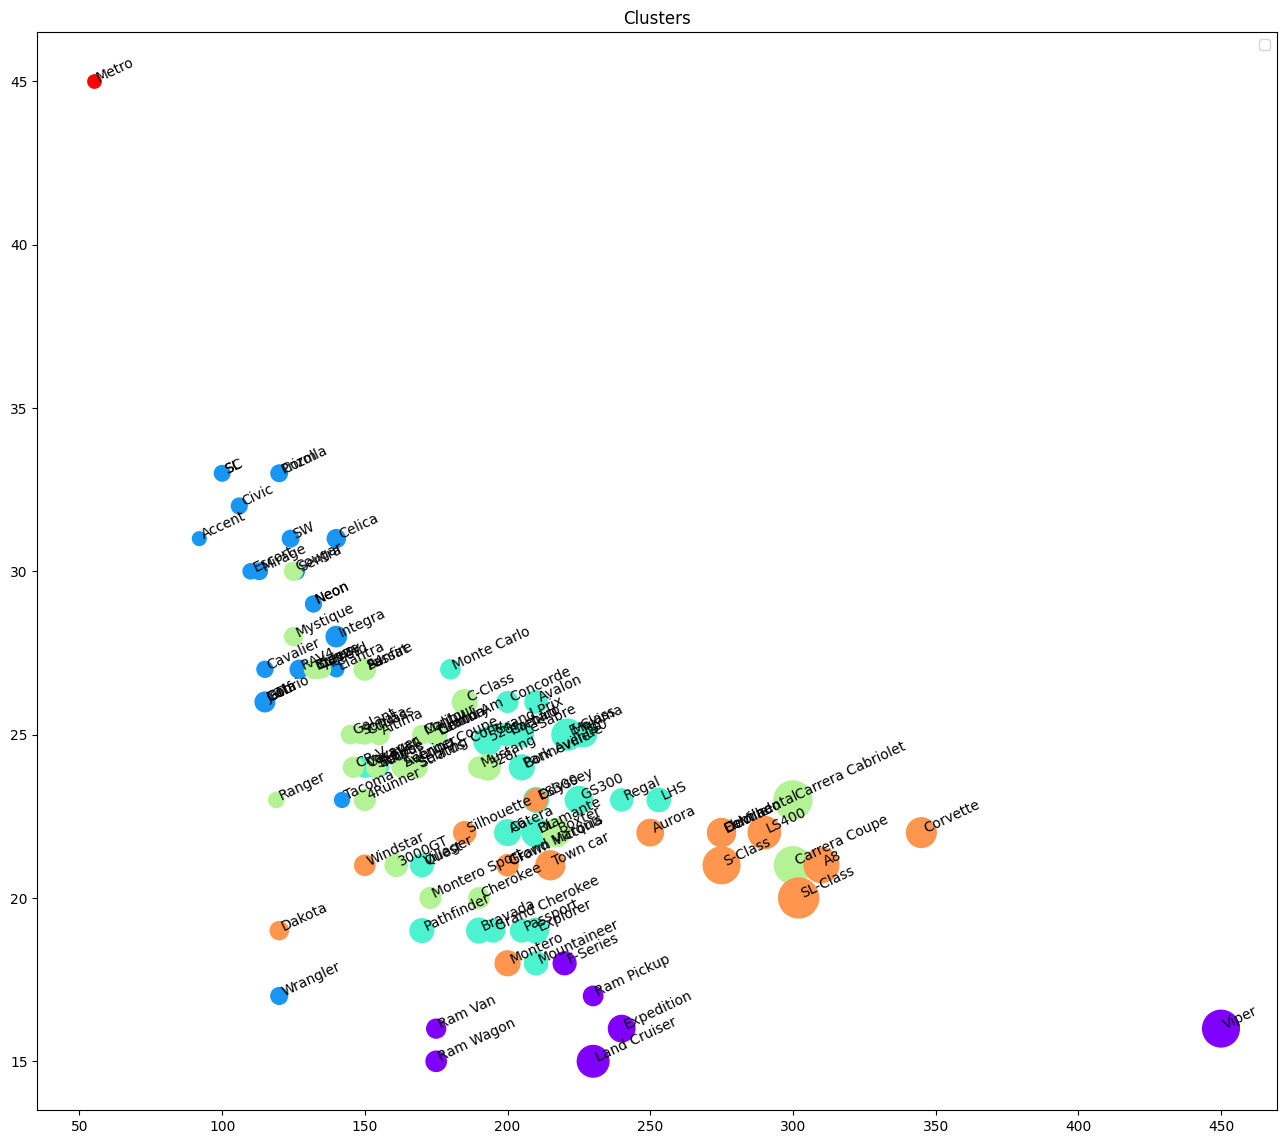

In [29]:
import matplotlib.cm as cm

n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16, 14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
        plt.text(subset.horsepow[i], subset.mpg[i], str(subset['model'][i]), rotation=25)
    plt.scatter(subset.horsepow, subset.mpg, s = subset.price*10, c=color)
plt.legend()
plt.title("Clusters")

In [30]:
df.groupby(["cluster_", "type"])["cluster_"].count()

cluster_  type
0         0.0      1
          1.0      6
1         0.0     20
          1.0      3
2         0.0     26
          1.0     10
3         0.0     28
          1.0      5
4         0.0     12
          1.0      5
5         0.0      1
Name: cluster_, dtype: int64

In [38]:
df.groupby(["cluster_", "type"])[["horsepow", "engine_s", "mpg", "price"]].mean()

horsepow  engine_s        mpg      price
cluster_ type                                            
0        0.0   450.000000  8.000000  16.000000  69.725000
         1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   118.500000  1.890000  29.550000  14.226100
         1.0   129.666667  2.300000  22.333333  14.292000
2        0.0   203.615385  3.284615  24.223077  27.988692
         1.0   182.000000  3.420000  20.300000  26.120600
3        0.0   168.107143  2.557143  25.107143  24.693786
         1.0   155.600000  2.840000  22.000000  19.807000
4        0.0   267.666667  4.566667  21.416667  46.417417
         1.0   173.000000  3.180000  20.600000  24.308400
5        0.0    55.000000  1.000000  45.000000   9.235000